In [1]:
from batchers import MnistBatcher

# Exploring the data

In [2]:
IMG_FILE = './testdata/t10k-images-idx3-ubyte.gz'
LBL_FILE = './testdata/t10k-labels-idx1-ubyte.gz'
batcher = MnistBatcher(IMG_FILE, LBL_FILE, 10000)

In [ ]:
batcher.imgs[5,10:18,10:18,0]

In [ ]:
batcher.imgs.shape

In [ ]:
imgs, lbls = batcher.next_batch(20)

In [ ]:
lbls

# The analytics part
Here's where the real stuff happens

In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
SEED=1234

/Users/wgiersche/Project-Ellie/capsnet-fashion/venv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
def createGraph(name):
    with tf.name_scope(name):
        images = tf.placeholder(tf.float32, shape=[None, 784], name="images")
        labels = tf.placeholder(tf.int32, shape=[None], name="labels")   
        rnd_w = tf.truncated_normal([784, 10], mean=0.0, stddev=0.1, dtype=tf.float32, seed=SEED)
        W = tf.Variable(rnd_w)
        b = tf.Variable(tf.zeros([10]), dtype=tf.float32)
        Z = tf.matmul(images, W) + b
        A = tf.nn.softmax(Z, name="activation")
        Y_ = tf.one_hot(labels,10)
        objective = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=A), name="objective")
        return A, objective, images, labels

In [10]:
scope="mnist_softmax_regression"
A, objective, images, labels = createGraph(scope)

In [ ]:
train_step=tf.train.GradientDescentOptimizer(.3).minimize(objective)

In [11]:
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        batcher.reset()
        IMAGES, LABELS = batcher.next_batch(1000)
        X = IMAGES.reshape(-1, 784)
        train_step.run(session=sess, feed_dict={images: X, labels: LABELS})
    path = saver.save(sess, "./model.cpkt")

In [12]:
with tf.Session() as sess:
    saver.restore(sess, "./model.cpkt")
    batcher.reset()
    img, _ = batcher.next_batch(16)
    img = img.reshape(-1, 784)
    res=sess.run(A, feed_dict={images: img})

INFO:tensorflow:Restoring parameters from ./model.cpkt


In [9]:
tf.reset_default_graph()

In [ ]:
import os
os.environ["TMPDIR"]

In [13]:
np.argmax(res, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5])

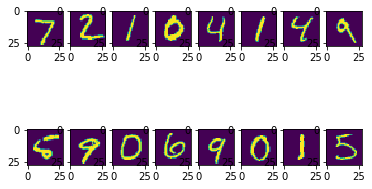

In [14]:
batcher.reset()
f, arr = plt.subplots(2,8)
for row in (0, 1):
    batch, _ = batcher.next_batch(8)
    for col in range(8):
        arr[row, col].imshow(batch[col, :, :])
        